<a href="https://colab.research.google.com/github/rameshbabulakshmanan84/MLProjects/blob/master/Knneighbors%20-%20binary%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Welcome to Colaboratory!</h1>


Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

In [0]:
#@title Introducing Colaboratory { display-mode: "form" }
#@markdown This 3-minute video gives an overview of the key features of Colaboratory:
from IPython.display import YouTubeVideo
YouTubeVideo('inN8seMm7UI', width=600, height=400)

## Getting Started

The document you are reading is a  [Jupyter notebook](https://jupyter.org/), hosted in Colaboratory. It is not a static page, but an interactive environment that lets you write and execute code in Python and other languages.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [0]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter".

All cells modify the same global state, so variables that you define by executing a cell can be used in other cells:

In [0]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

For more information about working with Colaboratory notebooks, see [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb).


## More Resources

Learn how to make the most of Python, Jupyter, Colaboratory, and related tools with these resources:

### Working with Notebooks in Colaboratory
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [First steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Intro to neural nets](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Intro to sparse data and embeddings](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

## Machine Learning Examples: Seedbank

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out the [Seedbank](https://research.google.com/seedbank/) project.

A few featured examples:

- [Neural Style Transfer](https://research.google.com/seedbank/seed/neural_style_transfer_with_tfkeras): Use deep learning to transfer style between images.
- [EZ NSynth](https://research.google.com/seedbank/seed/ez_nsynth): Synthesize audio with WaveNet auto-encoders.
- [Fashion MNIST with Keras and TPUs](https://research.google.com/seedbank/seed/fashion_mnist_with_keras_and_tpus): Classify fashion-related images with deep learning.
- [DeepDream](https://research.google.com/seedbank/seed/deepdream): Produce DeepDream images from your own photos.
- [Convolutional VAE](https://research.google.com/seedbank/seed/convolutional_vae): Create a generative model of handwritten digits.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


[False  True  True ...  True  True False]
precision score of SDG 0.9759080800593032
recall score of SDG 0.971407489393101
Accuracy score 0.9912857142857143


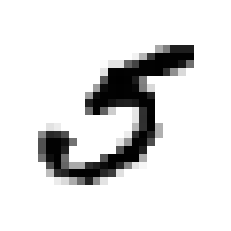

<Figure size 648x648 with 0 Axes>

In [6]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

#Import data sets
from sklearn.datasets import fetch_mldata
mnist=fetch_mldata('MNIST original')
#mnist

X,y=mnist['data'],mnist['target']
X.shape

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit=X[36000]
#some_digit
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")

#save_fig()

def plot_digit(data):
  image=data.reshape(28,28)
  plt.imshow(image,cmap=matplotlib.cm.binary,interpolation="nearest")
  plt.axis("off")

def plot_digits(instances,images_per_row=10,**options):
  size=28
  images_per_row=min(len(instances),images_per_row)
  images=[instance.reshape(size,size) for instance in instances]
  n_rows=(len(instances)-1)
  row_images=[]
  n_empty=n_rows*images_per_row - len(instances)
  images.append(np.zeros((size,size*n_empty)))
  for row in range(n_rows):
    rimages=images[row*images_per_row :(row+1)*images_per_row]
    row_images.append(np.concatenate(rimages,axis=1))
  image=np.concatenate(row_images,axis=0)
  plt.imshow(image,cmap=matplotlib.cm.binary,**options)
  plt.axis('off')

plt.figure(figsize=(9,9))
example_images=np.r_[X[:12000:600],X[13000:30600:600],X[30600:60000:590]]
#plot_digits(example_images,images_per_row=10)
#save_fig("more_digits_plot")
#plt.show()

#y[36000]

X_train,X_test,y_train,y_test=X[30000:37000],X[37000:40000],y[30000:37000],y[37000:40000]

import numpy as np
shuffle_index=np.random.permutation(7000)
#print(shuffle_index)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

#Train the classifier
y_train_5=(y_train==5)
y_test_5=(y_test==5)

from sklearn.linear_model import SGDClassifier
sdg_clf=SGDClassifier(random_state=42,max_iter=5,tol=None)
sdg_clf.fit(X_train,y_train_5)

#by default hinge loss is used,which gives linear svm classifier
sdg_clf.predict([X[10000]])

#Print cross validation score for the model
from sklearn.model_selection import cross_val_score
cross_val_score(sdg_clf,X_train,y_train_5,cv=3,scoring="accuracy")

from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sdg_clf,X_train,y_train_5,cv=3)

print(y_train_pred)

#print conusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

#precision and recall
from sklearn.metrics import precision_score, recall_score,accuracy_score
precision_score=precision_score(y_train_5, y_train_pred)
print("precision score of SDG",precision_score)
recall_score=recall_score(y_train_5,y_train_pred)
print("recall score of SDG",recall_score)

#Print the knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4,p=2,metric='minkowski')
knn.fit(X_train,y_train_5)
y_train_pred_knn=cross_val_predict(knn,X_train,y_train_5,cv=3)
#y_train_pred_knn=knn.predict(X_train)
#print("Confusion matrix of Knneighbors claasfier",confusion_matrix(y_train_5,y_train_pred_knn))
#precision_score1=precision_score(y_train_5, y_train_pred_knn)
#print("precision score of Knn",precision_score1)
#recall_score1=recall_score(y_train_5,y_train_pred_knn)
#print("recall score of Knn",recall_score1)
print("Accuracy score of KNN",accuracy_score(y_train_5,y_train_pred_knn))